In [1]:
%matplotlib nbagg

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors, cm

# importing system packages
import os
import sys
import glob
import h5py
import time
import itertools

# importing the workhorse
import numpy as np
import pandas as pd

# tiff packages
from PIL import Image
import tifffile

from xdrlib import *

# To load all methods, use
from mdaUtils import _readScan, _readMDA, readMDA
#
# For normal use, use
# from mdaUtils import *

## Getting information from a mda file

In [3]:
# Open file as a binary file
fMDA = open('26idbSOFT_0217.mda', 'rb')

# Read the entire file, and unpack it
buf = fMDA.read()
u = Unpacker(buf)

# read file header
version = u.unpack_float()
scan_number = u.unpack_int()
rank = u.unpack_int()
dimensions = u.unpack_farray(rank, u.unpack_int)
isRegular = u.unpack_int()
pExtra = u.unpack_int()
pmain_scan = fMDA.tell() - (len(buf) - u.get_position())

## Using the loader from the APS website

In [4]:
mdata = _readMDA('26idbSOFT_0050.mda')
mdata

26idbSOFT_0050.mda is a 1-D file; 1 dimensions read in.
dim[0] = dictionary of 8 scan-environment PVs
   usage: dim[0]['sampleEntry'] -> ('description', 'unit string', 'value')
dim[1] = 1D data from "b'26idbSOFT:scan1'": 41/41 pts; 2 pos's, 70 dets, 3 trigs
   usage: dim[1].p[2].data -> 1D array of positioner 2 data
   usage: dim[2].d[7].data -> 2D array of detector 7 data


[{'sampleEntry': ('description', 'unit string', 'value'),
  'filename': '26idbSOFT_0050.mda',
  'rank': 1,
  'dimensions': [41],
  b'26idbSOFT:saveData_realTime1D': (b'enum', '', b'Yes'),
  b'26idbSOFT:saveData_scanNumber': (b'long', '', [51]),
  b'26idbSOFT:saveData_fileSystem': (b'filesystem', '', b'/home/sector26'),
  b'26idbSOFT:scan1.P1SM': (b'scan mode', '', b'LINEAR')},

In [5]:
mdata = _readMDA('26idbSOFT_0217.mda')
mdata

26idbSOFT_0217.mda is a 2-D file; 2 dimensions read in.
dim[0] = dictionary of 8 scan-environment PVs
   usage: dim[0]['sampleEntry'] -> ('description', 'unit string', 'value')
dim[1] = 1D data from "b'26idbSOFT:scan2'": 61/61 pts; 1 pos's, 0 dets, 2 trigs
dim[2] = 2D data from "b'26idbSOFT:scan1'": 61/61 pts; 1 pos's, 70 dets, 3 trigs
   usage: dim[1].p[2].data -> 1D array of positioner 2 data
   usage: dim[2].d[7].data -> 2D array of detector 7 data


[{'sampleEntry': ('description', 'unit string', 'value'),
  'filename': '26idbSOFT_0217.mda',
  'rank': 2,
  'dimensions': [61, 61],
  b'26idbSOFT:saveData_realTime1D': (b'enum', '', b'Yes'),
  b'26idbSOFT:saveData_scanNumber': (b'long', '', [218]),
  b'26idbSOFT:saveData_fileSystem': (b'filesystem', '', b'/home/sector26'),
  b'26idbSOFT:scan1.P1SM': (b'scan mode', '', b'LINEAR')},

In [6]:
# Get the total number of dimensions, positioners and detectors
dim = mdata[0]['dimensions']
numPositioner = len(mdata[-1].p)
numDet = len(mdata[-1].d)

In [7]:
# Get the name of a positioner / detector
mdata[-1].p[-1].name.decode("utf-8")

'26idcnpi:X_HYBRID_SP.VAL'

<IPython.core.display.Javascript object>


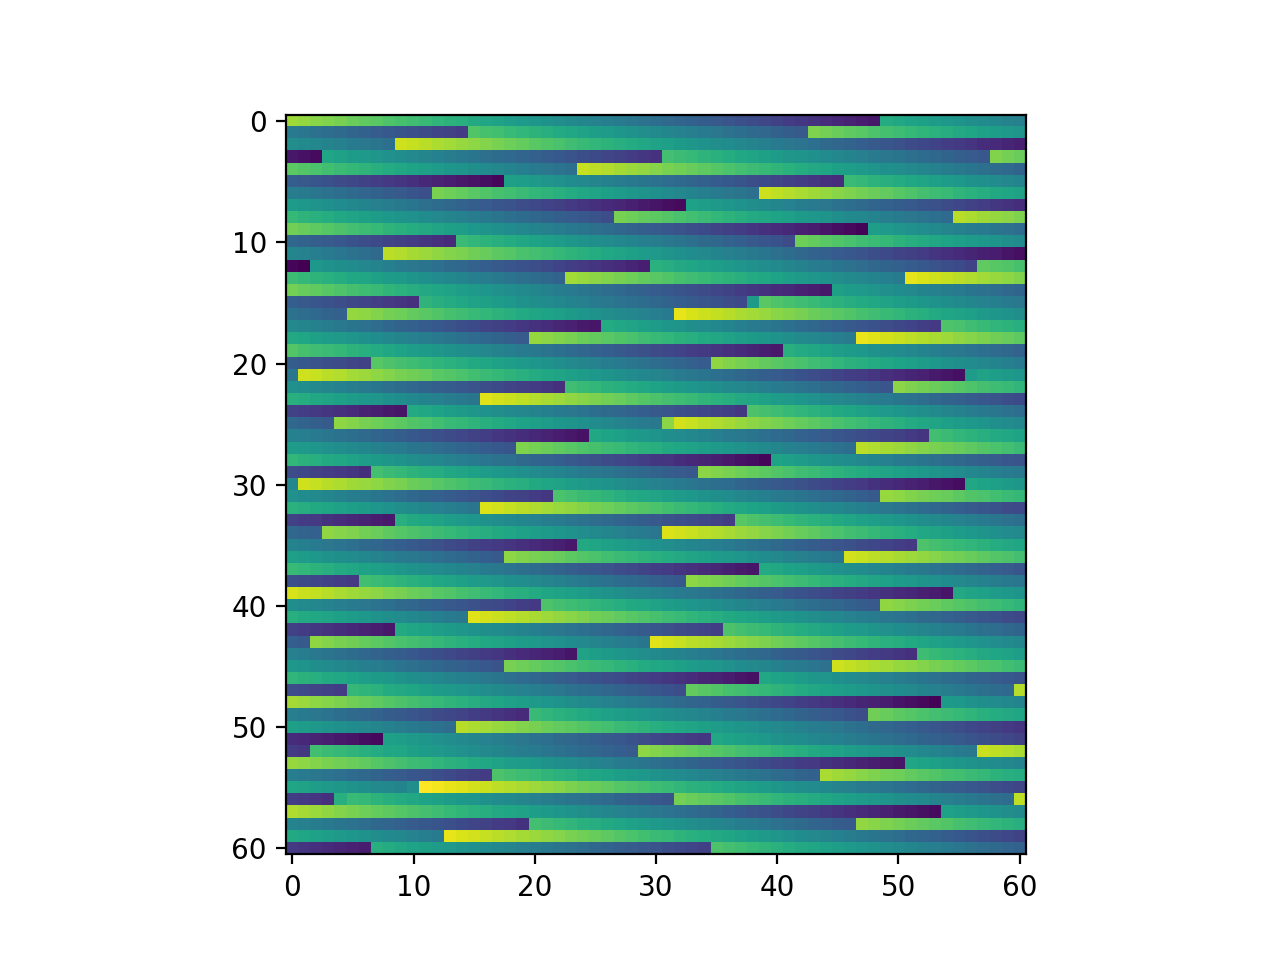

In [8]:
# Get the date of a positioner / detector
data = np.array(mdata[-1].d[-1].data)
plt.imshow(data)

## Using the loader

In [9]:
outPV = readMDA('26idbSOFT_0050.mda', verbose=1)

P1: 26idbATTO:PIC867:1:m1.VAL
P2: 26idcDET:base:Theta.VAL
D1: 26idc:3820:scaler1_cts1.B
D2: 26idc:3820:scaler1_cts1.C
D3: 26idc:3820:scaler1_cts2.B
D4: 26idaSOFT:userCalcOut00.VAL
D5: 26idaSOFT:userCalcOut07.VAL
D6: 26idaSOFT:userCalcOut14.VAL
D7: QMPX3:Stats1:Total_RBV
D8: QMPX3:Stats2:Total_RBV
D9: QMPX3:Stats3:Total_RBV
D10: QMPX3:Stats4:Total_RBV
D11: dp_pilatus4:Stats1:Total_RBV
D12: dp_pilatus4:Stats2:Total_RBV
D13: dp_pilatus4:Stats3:Total_RBV
D14: dp_pilatus4:Stats4:Total_RBV
D15: QMPX3:TIFF1:FileNumber_RBV
D16: dp_pilatus4:cam1:FileNumber
D17: QMPX3:Stats1:CentroidX_RBV
D18: QMPX3:Stats1:CentroidY_RBV
D19: QMPX3:Stats2:CentroidX_RBV
D20: QMPX3:Stats2:CentroidY_RBV
D21: QMPX3:Stats3:CentroidX_RBV
D22: QMPX3:Stats3:CentroidY_RBV
D23: QMPX3:Stats4:CentroidX_RBV
D24: QMPX3:Stats4:CentroidY_RBV
D25: 26idcXMAP:mca8.R0
D26: 26idcXMAP:mca8.R4
D27: 26idcXMAP:mca8.R6
D28: 26idcXMAP:mca8.R7
D29: 26idaSOFT:userCalcOut27.VAL
D30: 26idaSOFT:userCalcOut27.VAL
D31: 26idaSOFT:userCalcOut27.VAL

<IPython.core.display.Javascript object>


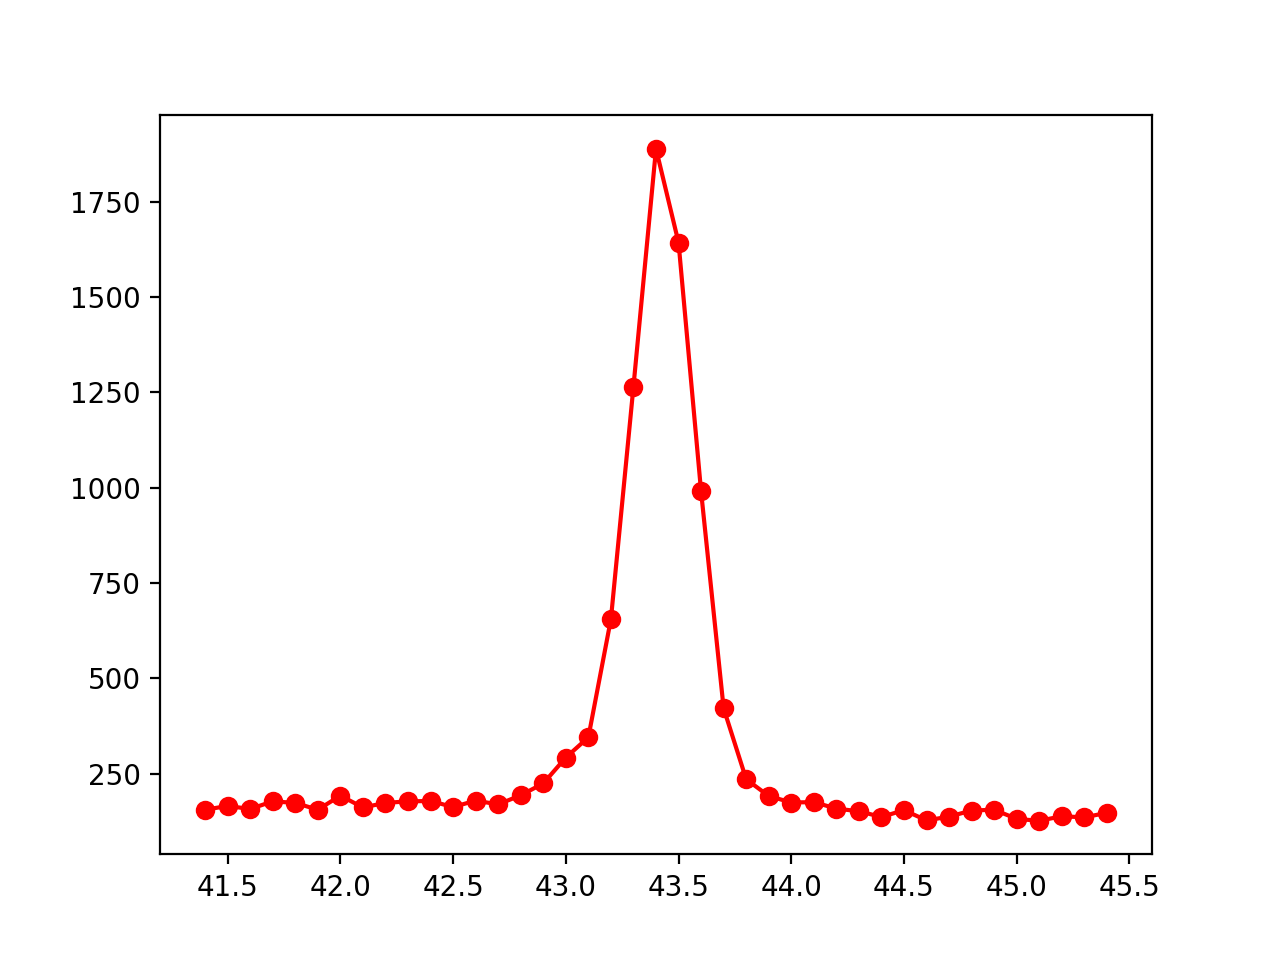

In [10]:
plt.figure()
plt.plot(outPV['P2: 26idcDET:base:Theta.VAL'], outPV['D7: QMPX3:Stats1:Total_RBV'], 'ro-')

In [11]:
outPV = readMDA('26idbSOFT_0217.mda', verbose=1)

P1: 26idcnpi:X_HYBRID_SP.VAL
D1: 26idc:3820:scaler1_cts1.B
D2: 26idc:3820:scaler1_cts1.C
D3: 26idc:3820:scaler1_cts2.B
D4: 26idaSOFT:userCalcOut00.VAL
D5: 26idaSOFT:userCalcOut07.VAL
D6: 26idaSOFT:userCalcOut14.VAL
D7: QMPX3:Stats1:Total_RBV
D8: QMPX3:Stats2:Total_RBV
D9: QMPX3:Stats3:Total_RBV
D10: QMPX3:Stats4:Total_RBV
D11: 26idcSOFT:LS336:tc1:I1_RBV
D12: 26idcSOFT:LS336:tc1:D1_RBV
D13: 26idcSOFT:LS336:tc1:I2_RBV
D14: 26idcSOFT:LS336:tc1:D2_RBV
D15: QMPX3:TIFF1:FileNumber_RBV
D16: dp_pilatus4:cam1:FileNumber
D17: QMPX3:Stats1:CentroidX_RBV
D18: QMPX3:Stats1:CentroidY_RBV
D19: QMPX3:Stats2:CentroidX_RBV
D20: QMPX3:Stats2:CentroidY_RBV
D21: QMPX3:Stats3:CentroidX_RBV
D22: QMPX3:Stats3:CentroidY_RBV
D23: QMPX3:Stats4:CentroidX_RBV
D24: QMPX3:Stats4:CentroidY_RBV
D25: 26idcXMAP:mca8.R0
D26: 26idcXMAP:mca8.R4
D27: 26idcXMAP:mca8.R6
D28: 26idcXMAP:mca8.R7
D29: 26idcSOFT:LS336:tc1:IN1
D30: 26idcSOFT:LS336:tc1:IN2
D31: 26idcSOFT:LS336:tc1:P2_RBV
D32: 26idc:3820:scaler1_cts1.D
D33: 26idcSOFT

<IPython.core.display.Javascript object>


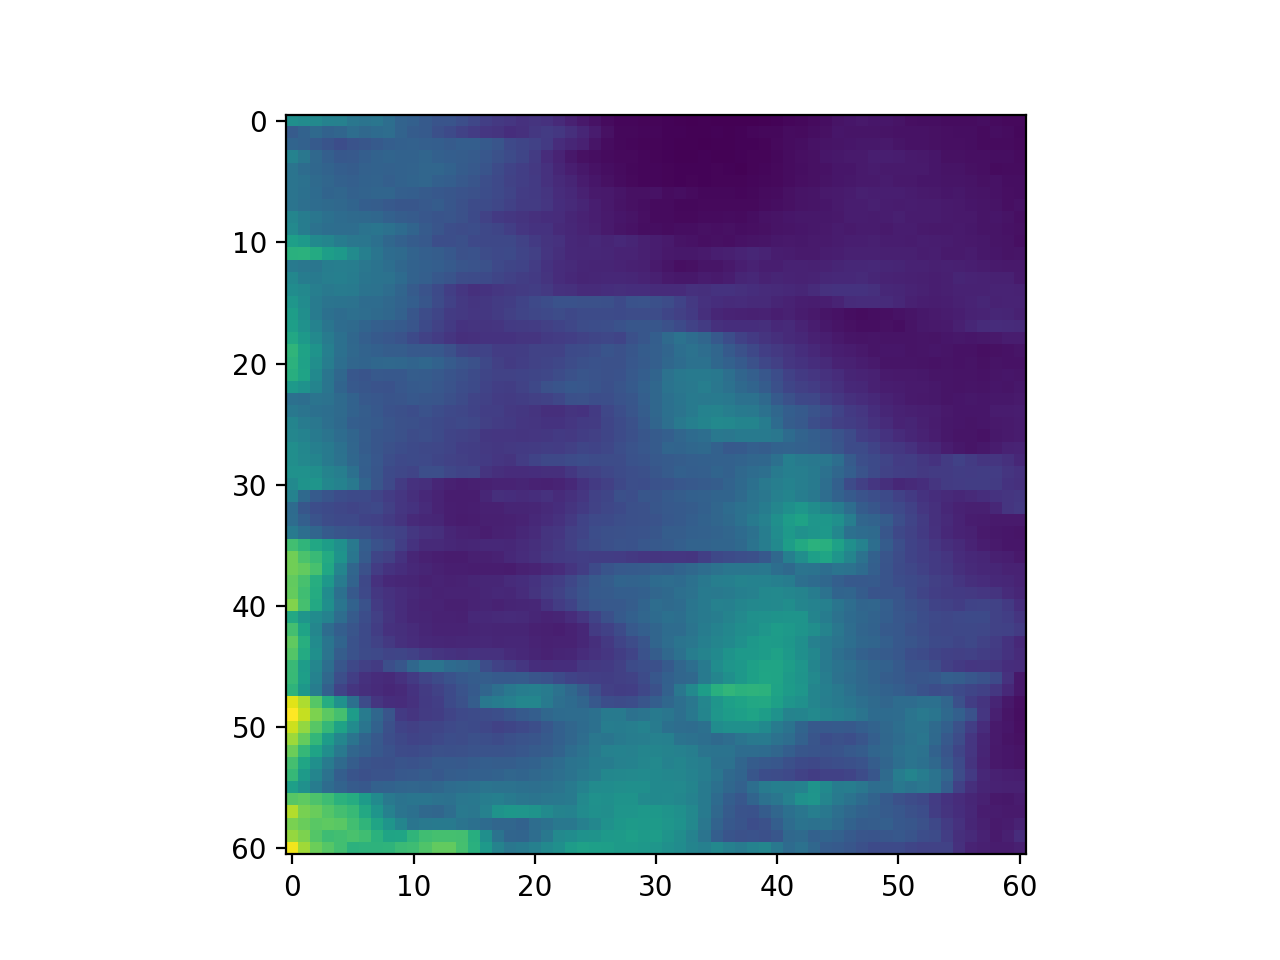

In [12]:
plt.figure()
plt.imshow(outPV['D9: QMPX3:Stats3:Total_RBV'])